In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import glob
import os
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.gridspec

In [2]:
# Set style parameters globally
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'black'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# ---------------------------------
# Step 1: Read the CSV file
# ---------------------------------
# Read the CSV file into a pandas DataFrame
arm_df = pd.read_csv('/Users/sultanalharbi/Library/CloudStorage/OneDrive-Personal/Projects/sWGS_TKI/CNA Analysis/cBioPortal_HCC/cBioPortal_combined_study_segments_516samples.csv')

In [4]:
arm_df.head()

,sample,chr,arm,median_bpWeighted,total_bins,total_bpOverlap,top_event,top_event_bp,top_event_fraction
0,P-0000037-T02-IM3,chr1,p,-0.349803,606.298872,217499038,Losses,193842682,0.891235
1,P-0000037-T02-IM3,chr1,q,0.506852,479.354954,239983416,Gains,188818524,0.786798
2,P-0000037-T02-IM3,chr16,p,-0.645500,204.014040,73549858,Losses,73549858,1.000000
3,P-0000037-T02-IM3,chr16,q,-0.645500,293.985959,105985968,Losses,105985968,1.000000
4,P-0000037-T02-IM3,chr2,p,-0.634600,364.329211,171665824,Losses,171665824,1.000000


In [5]:
all_arms = [f'chr{i}{arm}' for i in range(1, 23) for arm in ['p','q']]

In [6]:
total_samples = arm_df['sample'].nunique()
print(f'Total samples: {total_samples}')

Total samples: 233


In [7]:
def classify_event(top_event):
    if top_event == 'Gains':
        return 'Gains'
    elif top_event in ['Losses']:
        return 'Losses'
    else:
        return 'Neutral'

arm_df['Category'] = arm_df['top_event'].apply(classify_event)

In [8]:
# ---------------------------------------------------------
# Step 2: Create a combined arm label, e.g. "chr1p"
# ---------------------------------------------------------
# We assume your 'chr' column already has values like "chr1", "chr2", ...
# Then your 'arm' column is just "p" or "q".
# We'll combine them into one "chr1p" label.

arm_df['chr_arm'] = arm_df['chr'] + arm_df['arm']  # e.g. "chr1" + "p" => "chr1p"


In [9]:
arm_df.head()

,sample,chr,arm,median_bpWeighted,total_bins,total_bpOverlap,top_event,top_event_bp,top_event_fraction,Category,chr_arm
0,P-0000037-T02-IM3,chr1,p,-0.349803,606.298872,217499038,Losses,193842682,0.891235,Losses,chr1p
1,P-0000037-T02-IM3,chr1,q,0.506852,479.354954,239983416,Gains,188818524,0.786798,Gains,chr1q
2,P-0000037-T02-IM3,chr16,p,-0.645500,204.014040,73549858,Losses,73549858,1.000000,Losses,chr16p
3,P-0000037-T02-IM3,chr16,q,-0.645500,293.985959,105985968,Losses,105985968,1.000000,Losses,chr16q
4,P-0000037-T02-IM3,chr2,p,-0.634600,364.329211,171665824,Losses,171665824,1.000000,Losses,chr2p


In [10]:
# ---------------------------------------------------------
# Step 3: Define the order of arms to analyze
# ---------------------------------------------------------
# For autosomes 1–22, p and q arms:
all_arms = [f'chr{i}{arm}' for i in range(1, 23) for arm in ['p', 'q']]

# (If you need to include chrX or chrY arms, append them here.)

In [11]:

# ---------------------------------------------------------
# Step 4: Data Analysis
# ---------------------------------------------------------
# Calculate total number of unique samples
total_samples = arm_df['sample'].nunique()
print(f'Total samples: {total_samples}')

Total samples: 233


In [12]:

def calculate_cnv_stats_for_arm(arm_label, df):
    # Filter data for the specific arm
    sub_data = df[df['chr_arm'] == arm_label]
    
    # Calculate unique samples for Gains and Losses in one go
    unique_samples = sub_data['sample'].nunique()
    gains = sub_data['top_event'].value_counts().get('Gains', 0)
    losses = sub_data['top_event'].value_counts().get('Losses', 0)
    
    # Total abnormalities = # unique samples that have Gains or Losses
    samples_with_abnormalities = sub_data[sub_data['top_event'].isin(['Gains', 'Losses'])]['sample'].nunique()
    
    # Calculate total percentage if total_samples is defined
    total_percent = (samples_with_abnormalities / total_samples * 100) if total_samples else 0
    
    return {
        'Chrom_Arm': arm_label,
        'Gains': gains,
        'Losses': losses,
        'Total_Abnormalities': samples_with_abnormalities,
        'Total_Percent': total_percent
    }

# Assuming all_arms and arm_df are defined
results = [calculate_cnv_stats_for_arm(arm, arm_df) for arm in all_arms]

# Create a DataFrame from the results
summary_df = pd.DataFrame(results)

# Improved print output
print("\nChromosomal Abnormality Summary:")
print("=" * 50)
print(summary_df.to_string(index=False))  # Print DataFrame without index
print("=" * 50)

# Optionally, you can print summary statistics
print("\nSummary Statistics:")
print(f"Total Gains: {summary_df['Gains'].sum()}")
print(f"Total Losses: {summary_df['Losses'].sum()}")
print(f"Total Abnormalities: {summary_df['Total_Abnormalities'].sum()}")
print(f"Average Total Percent: {summary_df['Total_Percent'].mean():.2f}%")


Chromosomal Abnormality Summary:
Chrom_Arm  Gains  Losses  Total_Abnormalities  Total_Percent
    chr1p     10      26                   36      15.450644
    chr1q    125       0                  125      53.648069
    chr2p      2       3                    5       2.145923
    chr2q      2       9                   11       4.721030
    chr3p      5       4                    9       3.862661
    chr3q      2       4                    6       2.575107
    chr4p     10      15                   25      10.729614
    chr4q      0      49                   49      21.030043
    chr5p     21       1                   22       9.442060
    chr5q     16       5                   21       9.012876
    chr6p     61       0                   61      26.180258
    chr6q      7      53                   60      25.751073
    chr7p     32       1                   33      14.163090
    chr7q     24       2                   26      11.158798
    chr8p      3     135                  138      

/var/folders/zx/kbmrsj8d7y54tbzk_hc19nnh0000gn/T/ipykernel_43205/3438327501.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels([abs(int(y)) for y in y_ticks])


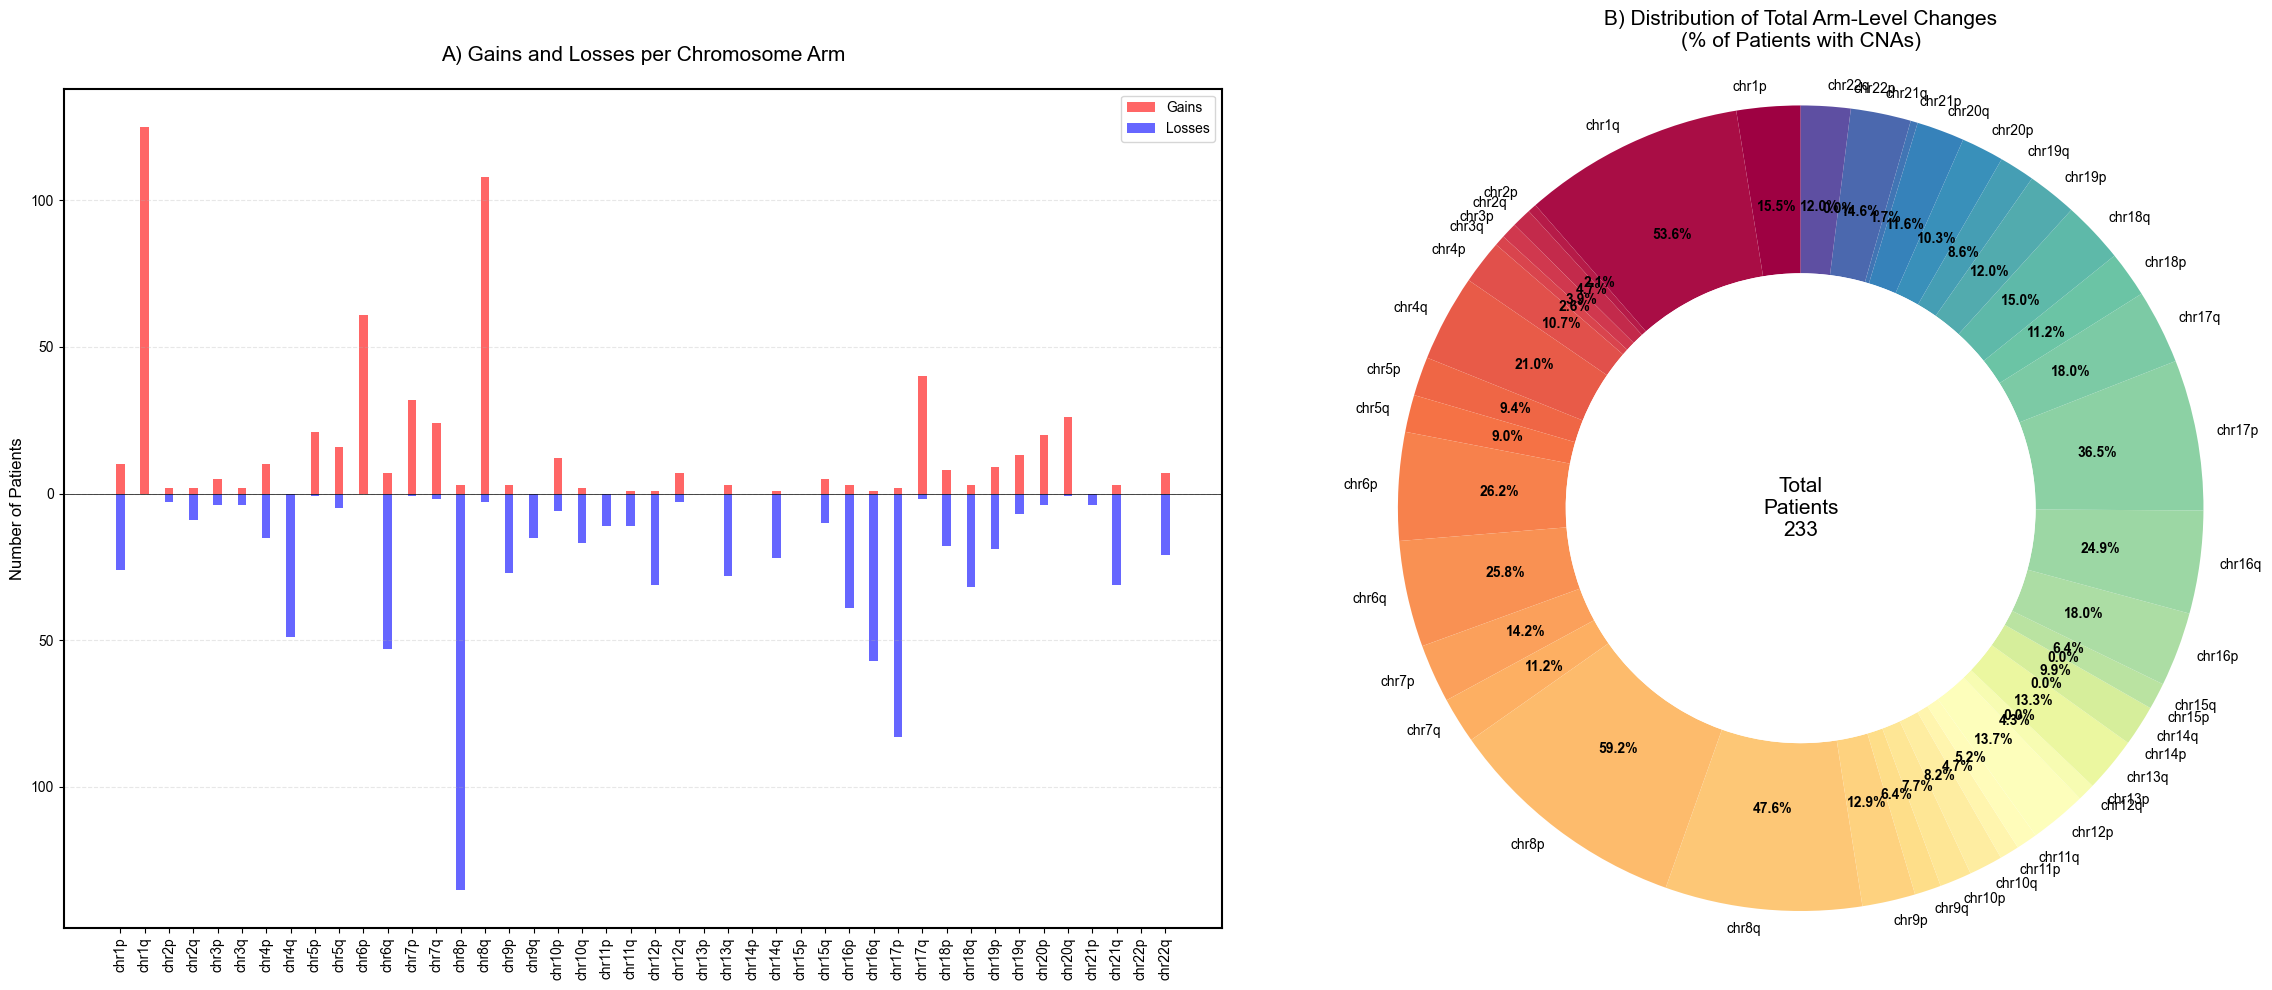


Arm-Level Abnormality Summary:
Chrom_Arm  Total_Abnormalities  Total_Percent
    chr1p                   36      15.450644
    chr1q                  125      53.648069
    chr2p                    5       2.145923
    chr2q                   11       4.721030
    chr3p                    9       3.862661
    chr3q                    6       2.575107
    chr4p                   25      10.729614
    chr4q                   49      21.030043
    chr5p                   22       9.442060
    chr5q                   21       9.012876
    chr6p                   61      26.180258
    chr6q                   60      25.751073
    chr7p                   33      14.163090
    chr7q                   26      11.158798
    chr8p                  138      59.227468
    chr8q                  111      47.639485
    chr9p                   30      12.875536
    chr9q                   15       6.437768
   chr10p                   18       7.725322
   chr10q                   19       8.154506
  

In [13]:

# ---------------------------------------------------------
# Step 6: Visualization
# ---------------------------------------------------------
fig = plt.figure(figsize=(24, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# -----------------------
# A) Bar Plot
# -----------------------
ax1 = fig.add_subplot(gs[0])

x = np.arange(len(all_arms))
width = 0.35

gains_bars = ax1.bar(x, summary_df['Gains'], width, label='Gains', color='red', alpha=0.6)
losses_bars = ax1.bar(x, -summary_df['Losses'], width, label='Losses', color='blue', alpha=0.6)

# Optionally add numeric labels:
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        value = abs(height)
        # Place the label just above or below the bar
        if height > 0:
            y_pos = height + 0.5
        else:
            y_pos = height - 0.5
        ax.text(bar.get_x() + bar.get_width()/2., y_pos,
                f'{int(value)}', ha='center',
                va='bottom' if height > 0 else 'top')

# Uncomment if you want bar labels:
# add_value_labels(ax1, gains_bars)
# add_value_labels(ax1, losses_bars)

# Make y-axis show positive labels for both gains and losses
y_ticks = ax1.get_yticks()
ax1.set_yticklabels([abs(int(y)) for y in y_ticks])

ax1.set_xticks(x)
ax1.set_xticklabels(all_arms, rotation=90)
ax1.set_ylabel('Number of Patients', fontsize=12)
ax1.set_title('A) Gains and Losses per Chromosome Arm', pad=20, size=15)
ax1.legend()
ax1.grid(True, axis='y', linestyle='--', alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# -----------------------
# B) Donut Chart
# -----------------------
ax2 = fig.add_subplot(gs[1])

percentages = summary_df['Total_Percent']
total_sum = percentages.sum()

colors = plt.cm.Spectral(np.linspace(0, 1, len(all_arms)))

def make_autopct(values):
    def my_autopct(pct):
        # Convert fraction-of-pie (pct) to actual % relative to total_sum
        true_pct = (pct / 100.0) * total_sum
        return f'{true_pct:.1f}%'
    return my_autopct

explode = [0]*len(all_arms)  # No explode, but you can highlight some arms if desired

wedges, texts, autotexts = ax2.pie(
    percentages,
    explode=explode,
    colors=colors,
    startangle=90,
    radius=1.2,
    labels=all_arms,
    autopct=make_autopct(percentages),
    pctdistance=0.75,
    labeldistance=1.05,
    wedgeprops=dict(width=0.5)  # donut shape
)

# Add a white circle to create the donut hole
centre_circle = plt.Circle((0,0), 0.70, fc='white')
ax2.add_artist(centre_circle)

plt.setp(autotexts, size=10, weight='bold')  # Percentage labels
plt.setp(texts, size=10)                     # Arm labels

# Add total sample count at center
ax2.text(0, 0, f'Total\nPatients\n{total_samples}',
         ha='center', va='center', fontsize=15)

ax2.set_title('B) Distribution of Total Arm-Level Changes\n(% of Patients with CNAs)',
              pad=30, size=15)

plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# Step 7: Print Summary
# ---------------------------------------------------------
print("\nArm-Level Abnormality Summary:")
print(summary_df[['Chrom_Arm','Total_Abnormalities','Total_Percent']].to_string(index=False))


/var/folders/zx/kbmrsj8d7y54tbzk_hc19nnh0000gn/T/ipykernel_43205/1800414233.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(['chrom_arm', 'event']).size().unstack(fill_value=0)


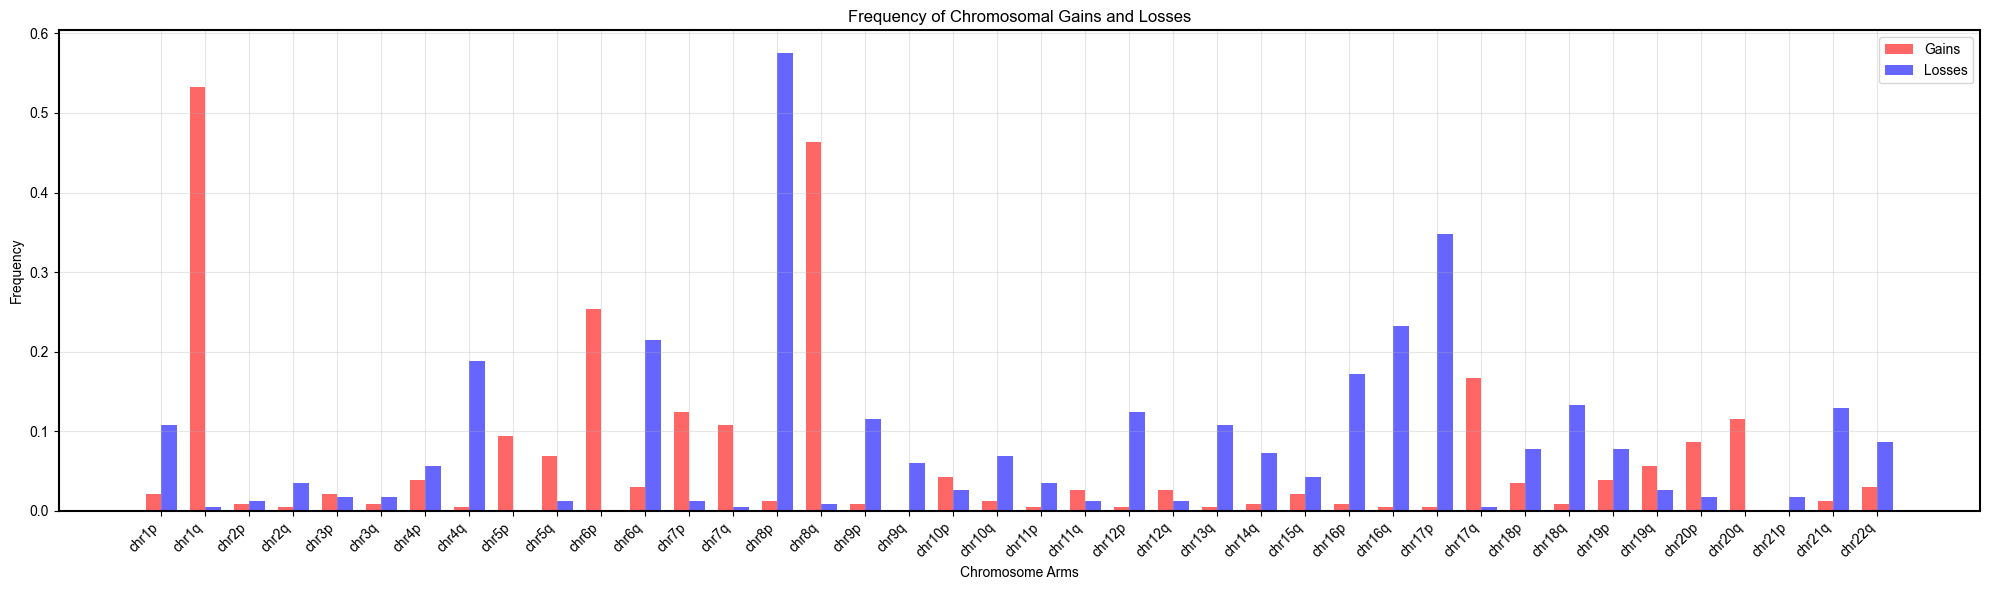

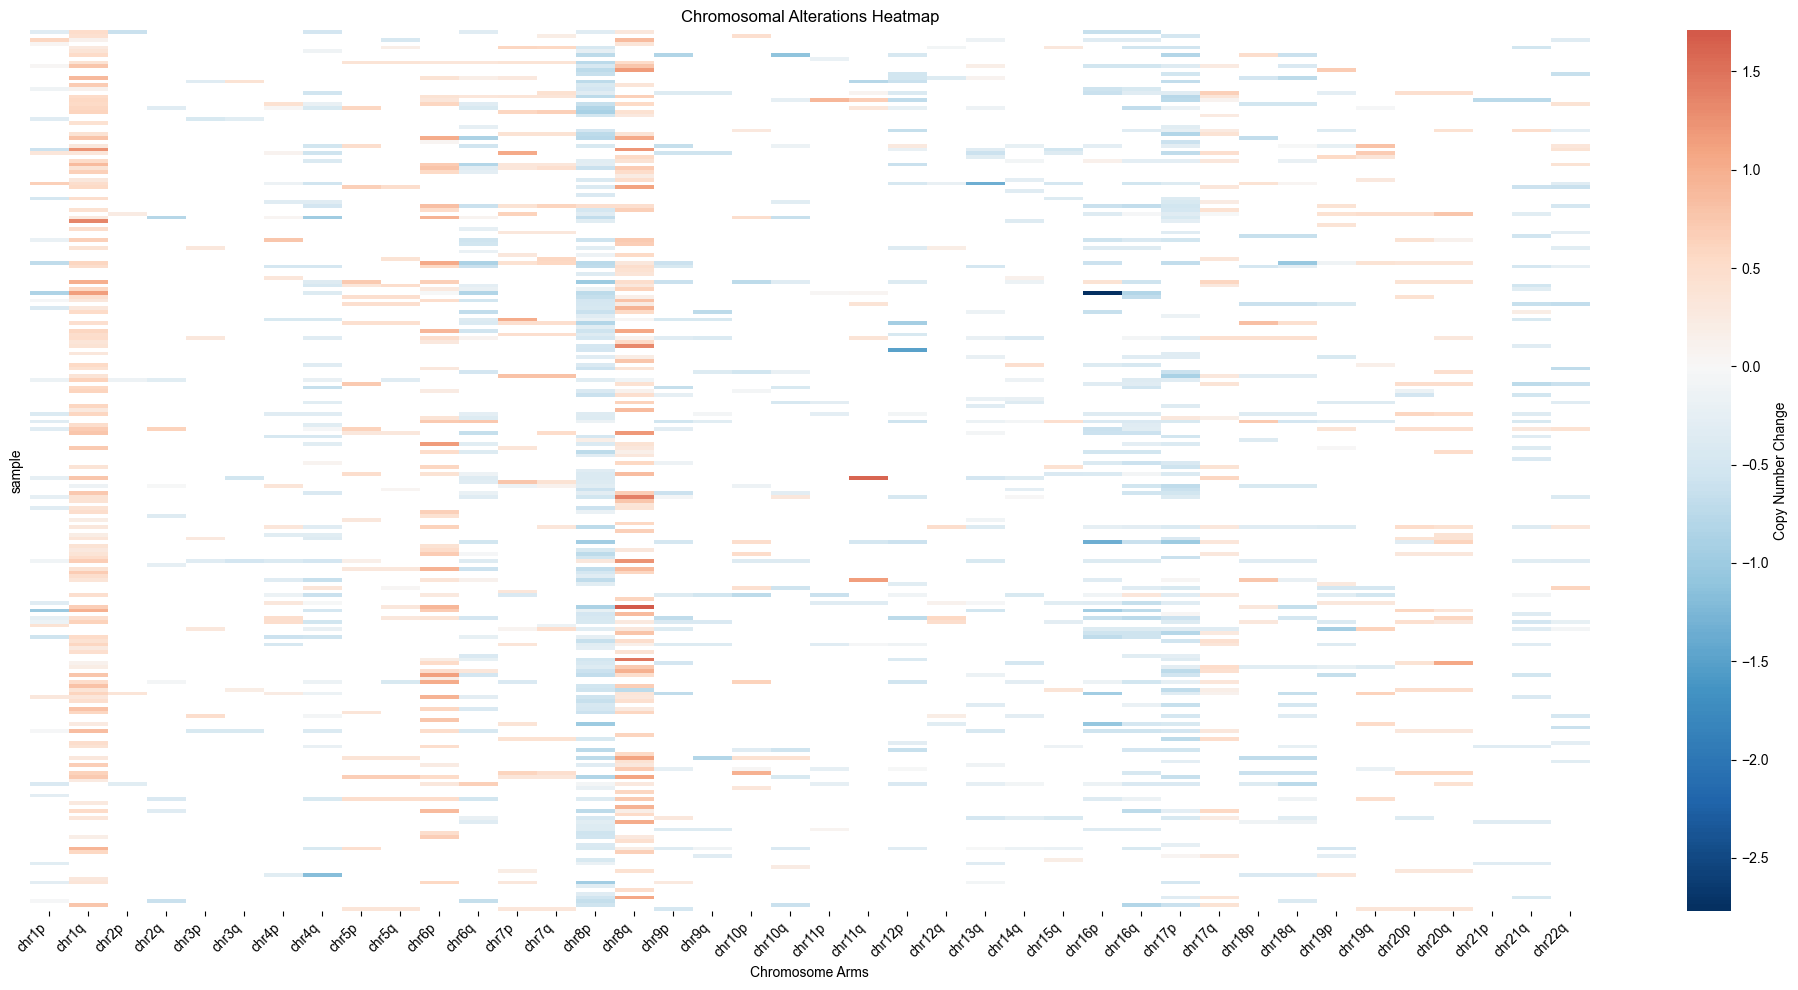

/var/folders/zx/kbmrsj8d7y54tbzk_hc19nnh0000gn/T/ipykernel_43205/1800414233.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='chrom_arm', y='median_bpWeighted', palette='Set3')


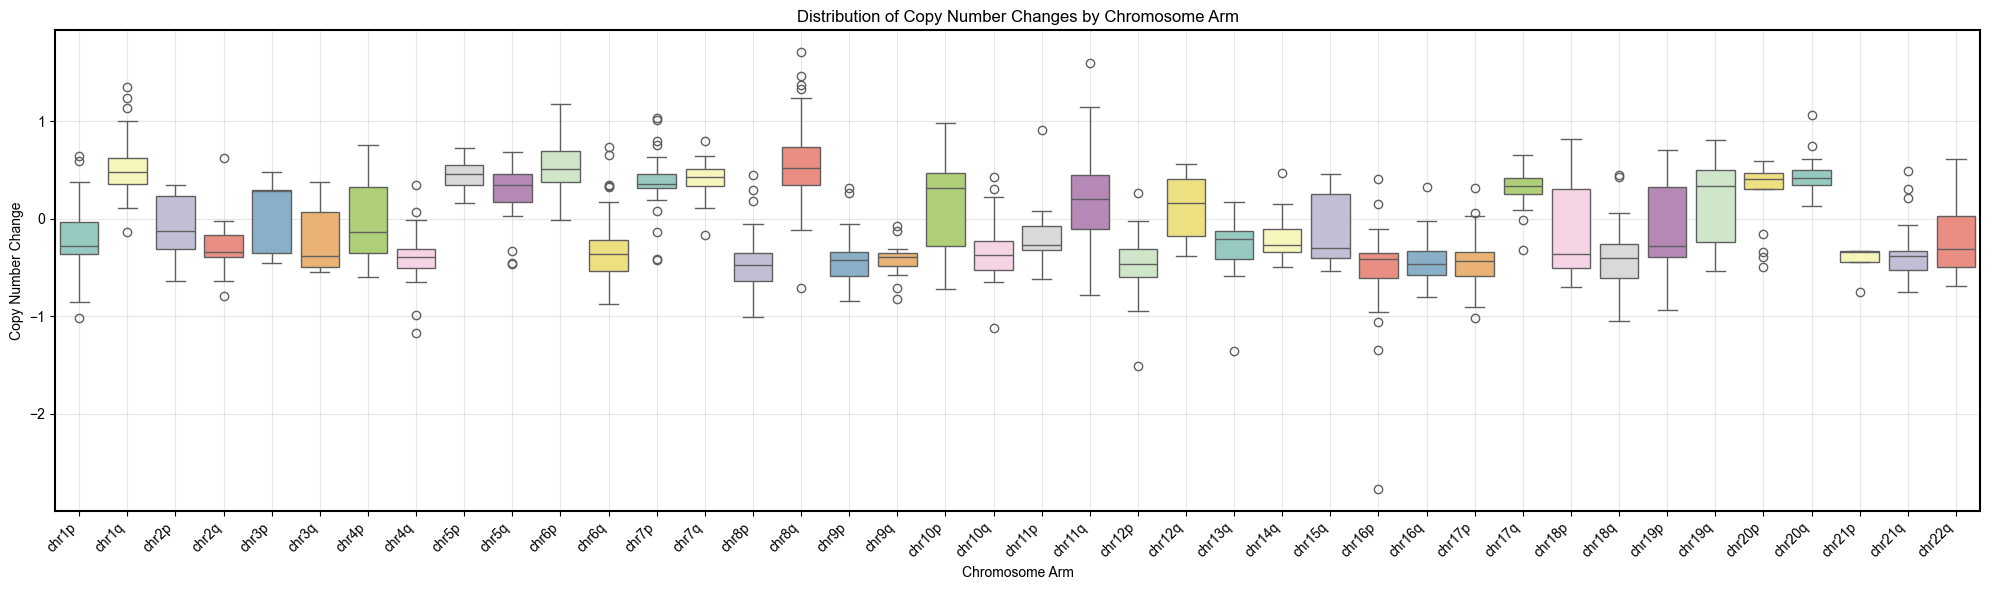

/var/folders/zx/kbmrsj8d7y54tbzk_hc19nnh0000gn/T/ipykernel_43205/1800414233.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='chrom_arm', y='median_bpWeighted', palette='Set3')


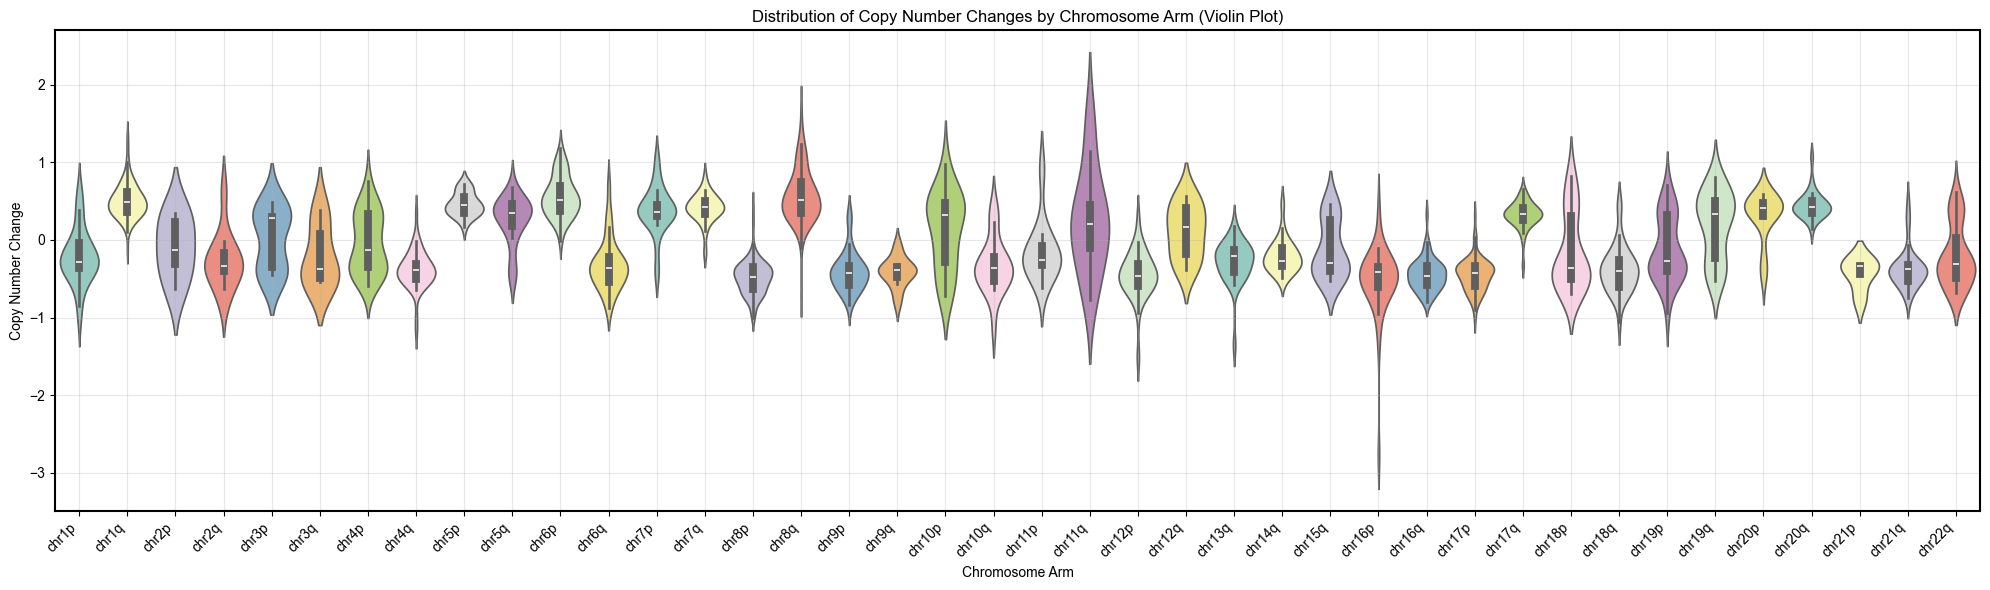

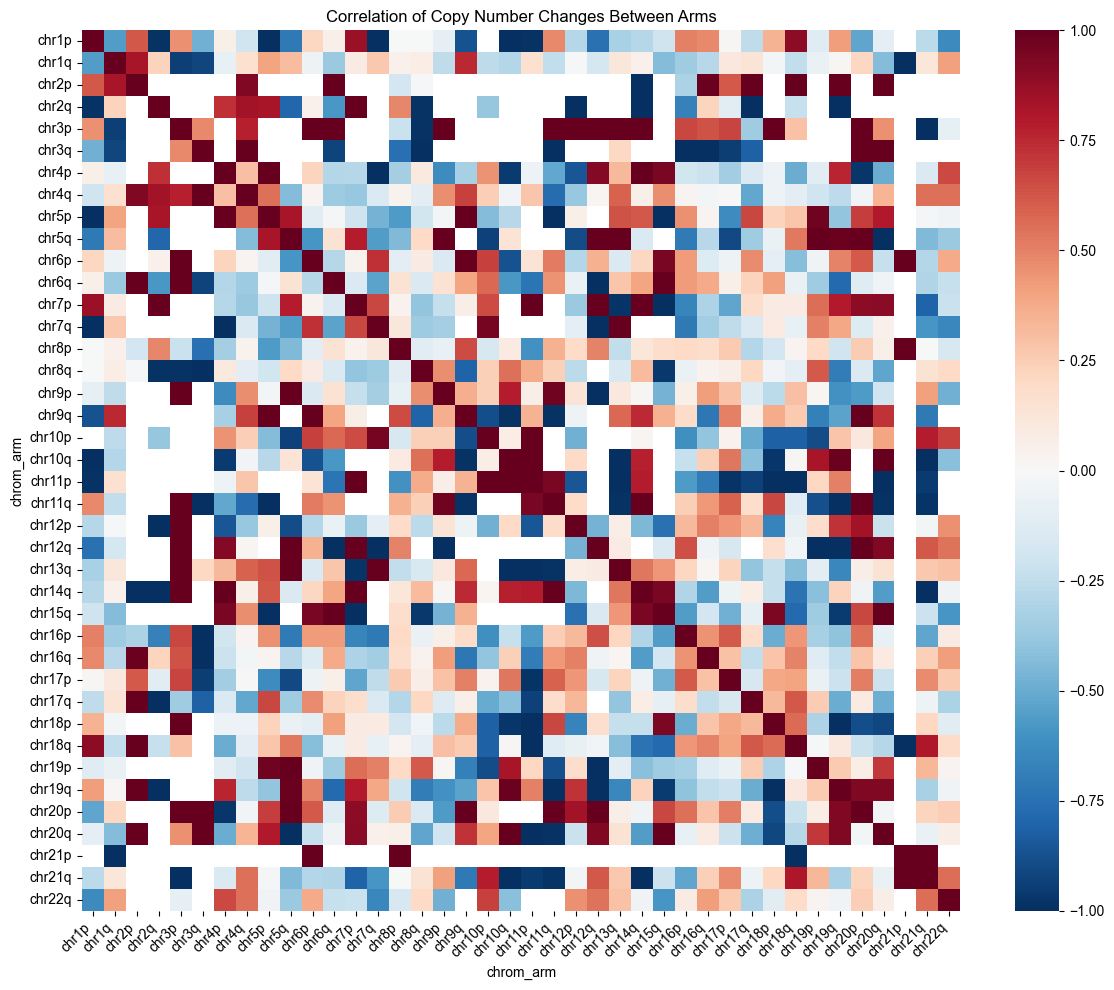


Chromosome arms present in the dataset:
['chr1p', 'chr1q', 'chr2p', 'chr2q', 'chr3p', 'chr3q', 'chr4p', 'chr4q', 'chr5p', 'chr5q', 'chr6p', 'chr6q', 'chr7p', 'chr7q', 'chr8p', 'chr8q', 'chr9p', 'chr9q', 'chr10p', 'chr10q', 'chr11p', 'chr11q', 'chr12p', 'chr12q', 'chr13q', 'chr14q', 'chr15q', 'chr16p', 'chr16q', 'chr17p', 'chr17q', 'chr18p', 'chr18q', 'chr19p', 'chr19q', 'chr20p', 'chr20q', 'chr21p', 'chr21q', 'chr22q']


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read data
df = pd.read_csv('/Users/sultanalharbi/Library/CloudStorage/OneDrive-Personal/Projects/sWGS_TKI/CNA Analysis/cBioPortal_HCC/cBioPortal_combined_study_segments_516samples.csv')

# Create combined chromosome-arm column
df['chrom_arm'] = df['chr'] + df['arm']

# Get the actual chromosome arms present in the data
existing_arms = sorted(df['chrom_arm'].unique(), 
                      key=lambda x: (int(''.join(filter(str.isdigit, x))), x[-1]))

# Convert to categorical with proper ordering
df['chrom_arm'] = pd.Categorical(df['chrom_arm'], categories=existing_arms, ordered=True)

# Create summary of gains/losses per chromosomal arm
def get_arm_summary(df):
    df['event'] = 'neutral'
    df.loc[df['median_bpWeighted'] > 0.1, 'event'] = 'gain'
    df.loc[df['median_bpWeighted'] < -0.1, 'event'] = 'loss'
    
    summary = df.groupby(['chrom_arm', 'event']).size().unstack(fill_value=0)
    summary['total'] = len(df['sample'].unique())
    summary['gain_freq'] = summary['gain'] / summary['total']
    summary['loss_freq'] = summary['loss'] / summary['total']
    
    return summary

summary = get_arm_summary(df)

# 1. Frequency Plot
plt.figure(figsize=(20, 6))
x = np.arange(len(summary.index))
width = 0.35

plt.bar(x - width/2, summary['gain_freq'], width, label='Gains', color='red', alpha=0.6)
plt.bar(x + width/2, summary['loss_freq'], width, label='Losses', color='blue', alpha=0.6)

plt.xlabel('Chromosome Arms')
plt.ylabel('Frequency')
plt.title('Frequency of Chromosomal Gains and Losses')
plt.xticks(x, summary.index, rotation=45, ha='right')  # Keep chr prefix
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Heatmap
plt.figure(figsize=(20, 10))
pivot_data = df.pivot(index='sample', columns='chrom_arm', values='median_bpWeighted')

sns.heatmap(pivot_data, cmap='RdBu_r', center=0, 
            cbar_kws={'label': 'Copy Number Change'},
            xticklabels=True, yticklabels=False)
plt.title('Chromosomal Alterations Heatmap')
plt.xlabel('Chromosome Arms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Boxplot
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='chrom_arm', y='median_bpWeighted', palette='Set3')
plt.title('Distribution of Copy Number Changes by Chromosome Arm')
plt.xlabel('Chromosome Arm')
plt.ylabel('Copy Number Change')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Violin Plot
plt.figure(figsize=(20, 6))
sns.violinplot(data=df, x='chrom_arm', y='median_bpWeighted', palette='Set3')
plt.title('Distribution of Copy Number Changes by Chromosome Arm (Violin Plot)')
plt.xlabel('Chromosome Arm')
plt.ylabel('Copy Number Change')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(12, 10))
corr_matrix = pivot_data.corr()

sns.heatmap(corr_matrix, 
            cmap='RdBu_r',
            center=0,
            vmin=-1, vmax=1,
            xticklabels=True, 
            yticklabels=True)
plt.title('Correlation of Copy Number Changes Between Arms')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print existing arms for reference
print("\nChromosome arms present in the dataset:")
print(existing_arms)

/var/folders/zx/kbmrsj8d7y54tbzk_hc19nnh0000gn/T/ipykernel_43205/3944607639.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(['chrom_arm', 'event']).size().unstack(fill_value=0)


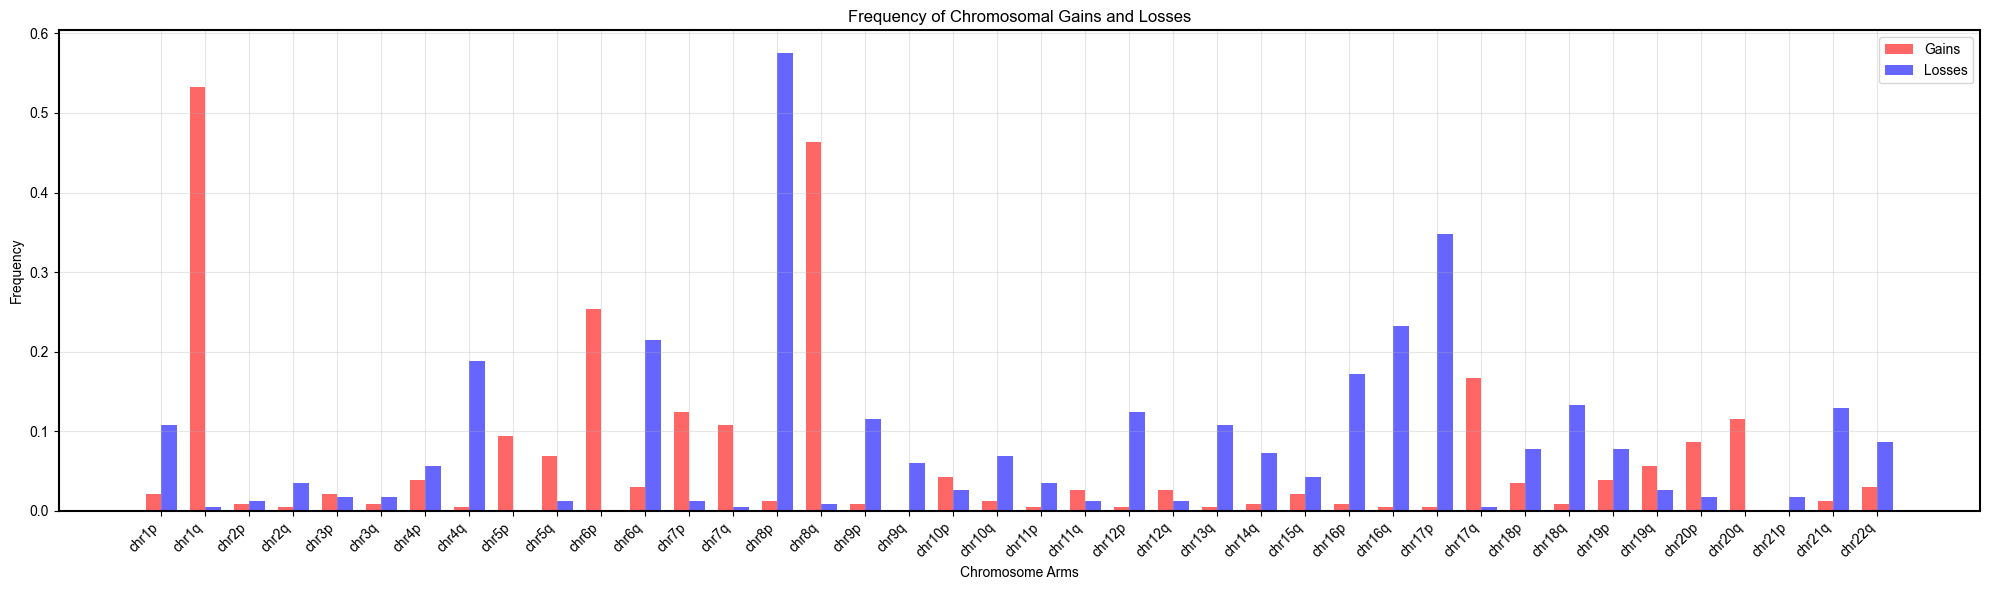


Chromosome arms present in the dataset:
['chr1p', 'chr1q', 'chr2p', 'chr2q', 'chr3p', 'chr3q', 'chr4p', 'chr4q', 'chr5p', 'chr5q', 'chr6p', 'chr6q', 'chr7p', 'chr7q', 'chr8p', 'chr8q', 'chr9p', 'chr9q', 'chr10p', 'chr10q', 'chr11p', 'chr11q', 'chr12p', 'chr12q', 'chr13q', 'chr14q', 'chr15q', 'chr16p', 'chr16q', 'chr17p', 'chr17q', 'chr18p', 'chr18q', 'chr19p', 'chr19q', 'chr20p', 'chr20q', 'chr21p', 'chr21q', 'chr22q']


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read data
df = pd.read_csv('/Users/sultanalharbi/Library/CloudStorage/OneDrive-Personal/Projects/sWGS_TKI/CNA Analysis/cBioPortal_HCC/cBioPortal_combined_study_segments_516samples.csv')

# Create combined chromosome-arm column
df['chrom_arm'] = df['chr'] + df['arm']

# Get the actual chromosome arms present in the data
existing_arms = sorted(df['chrom_arm'].unique(), 
                      key=lambda x: (int(''.join(filter(str.isdigit, x))), x[-1]))

# Convert to categorical with proper ordering
df['chrom_arm'] = pd.Categorical(df['chrom_arm'], categories=existing_arms, ordered=True)

# Create summary of gains/losses per chromosomal arm
def get_arm_summary(df):
    df['event'] = 'neutral'
    df.loc[df['median_bpWeighted'] > 0.1, 'event'] = 'gain'
    df.loc[df['median_bpWeighted'] < -0.1, 'event'] = 'loss'
    
    summary = df.groupby(['chrom_arm', 'event']).size().unstack(fill_value=0)
    summary['total'] = len(df['sample'].unique())
    summary['gain_freq'] = summary['gain'] / summary['total']
    summary['loss_freq'] = summary['loss'] / summary['total']
    
    return summary

summary = get_arm_summary(df)

# 1. Frequency Plot
plt.figure(figsize=(20, 6))
x = np.arange(len(summary.index))
width = 0.35

plt.bar(x - width/2, summary['gain_freq'], width, label='Gains', color='red', alpha=0.6)
plt.bar(x + width/2, summary['loss_freq'], width, label='Losses', color='blue', alpha=0.6)

plt.xlabel('Chromosome Arms')
plt.ylabel('Frequency')
plt.title('Frequency of Chromosomal Gains and Losses')
plt.xticks(x, summary.index, rotation=45, ha='right')  # Keep chr prefix
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



# Print existing arms for reference
print("\nChromosome arms present in the dataset:")
print(existing_arms)

/var/folders/zx/kbmrsj8d7y54tbzk_hc19nnh0000gn/T/ipykernel_43205/835167505.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(['chrom_arm', 'event']).size().unstack(fill_value=0)


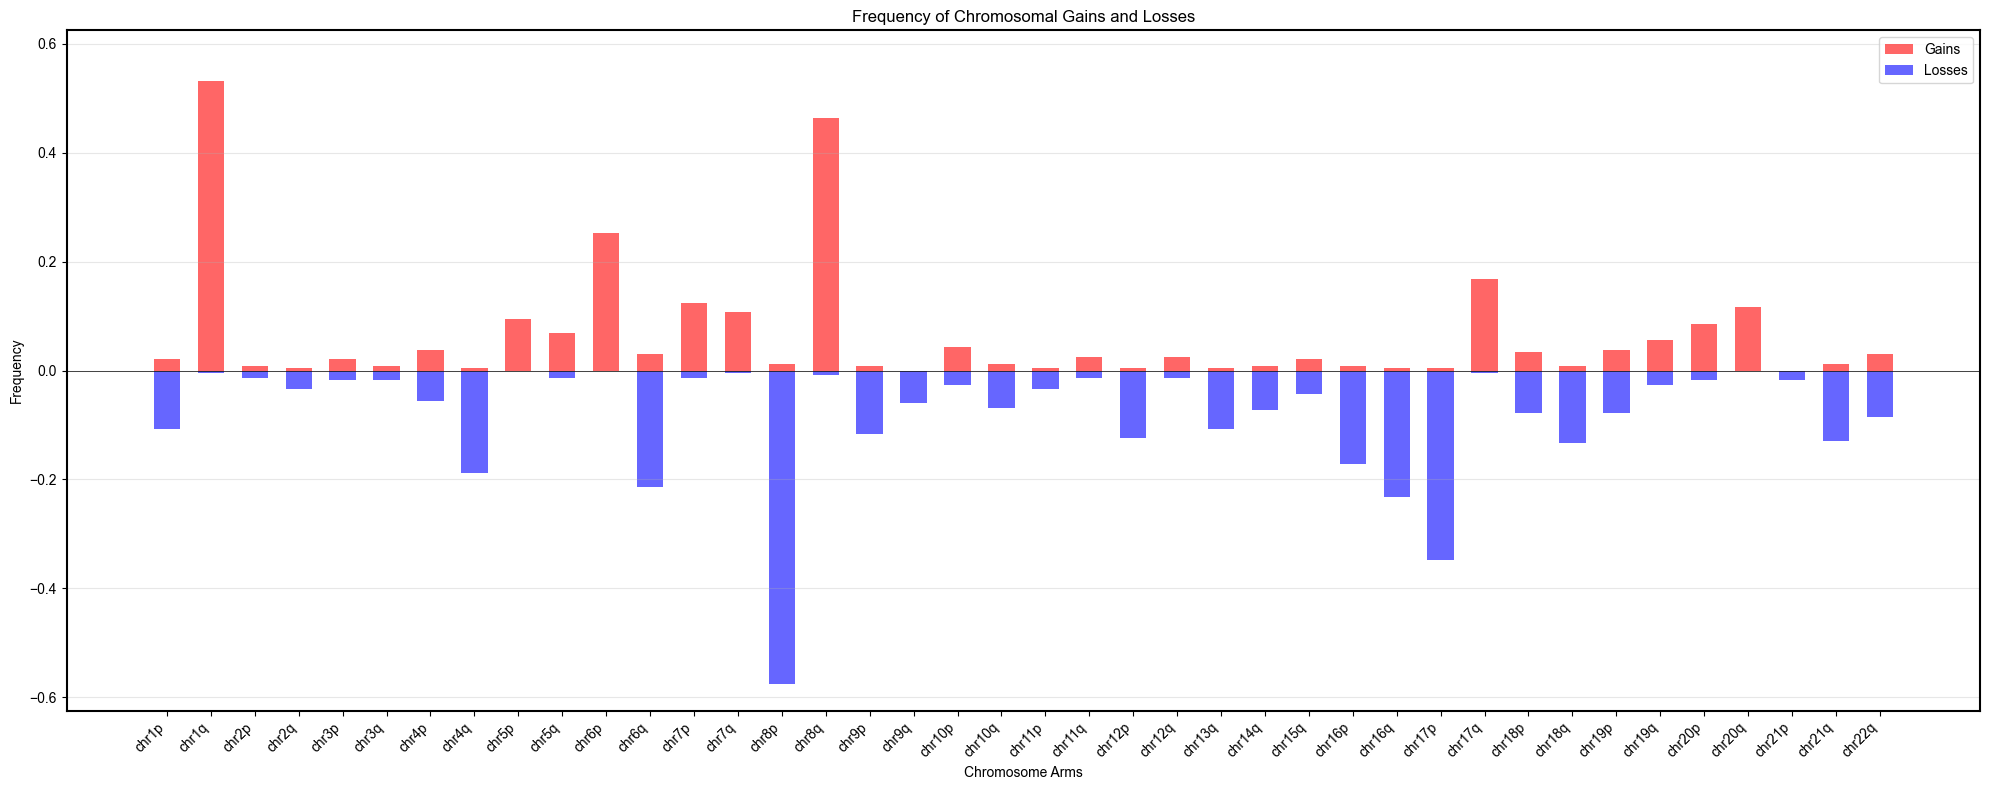


Chromosome arms present in the dataset:
['chr1p', 'chr1q', 'chr2p', 'chr2q', 'chr3p', 'chr3q', 'chr4p', 'chr4q', 'chr5p', 'chr5q', 'chr6p', 'chr6q', 'chr7p', 'chr7q', 'chr8p', 'chr8q', 'chr9p', 'chr9q', 'chr10p', 'chr10q', 'chr11p', 'chr11q', 'chr12p', 'chr12q', 'chr13q', 'chr14q', 'chr15q', 'chr16p', 'chr16q', 'chr17p', 'chr17q', 'chr18p', 'chr18q', 'chr19p', 'chr19q', 'chr20p', 'chr20q', 'chr21p', 'chr21q', 'chr22q']


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read data
df = pd.read_csv('/Users/sultanalharbi/Library/CloudStorage/OneDrive-Personal/Projects/sWGS_TKI/CNA Analysis/cBioPortal_HCC/cBioPortal_combined_study_segments_516samples.csv')

# Create combined chromosome-arm column
df['chrom_arm'] = df['chr'] + df['arm']

# Get the actual chromosome arms present in the data
existing_arms = sorted(df['chrom_arm'].unique(), 
                      key=lambda x: (int(''.join(filter(str.isdigit, x))), x[-1]))

# Convert to categorical with proper ordering
df['chrom_arm'] = pd.Categorical(df['chrom_arm'], categories=existing_arms, ordered=True)

# Create summary of gains/losses per chromosomal arm
def get_arm_summary(df):
    df['event'] = 'neutral'
    df.loc[df['median_bpWeighted'] > 0.1, 'event'] = 'gain'
    df.loc[df['median_bpWeighted'] < -0.1, 'event'] = 'loss'
    
    summary = df.groupby(['chrom_arm', 'event']).size().unstack(fill_value=0)
    summary['total'] = len(df['sample'].unique())
    summary['gain_freq'] = summary['gain'] / summary['total']
    summary['loss_freq'] = -summary['loss'] / summary['total']  # Make losses negative
    
    return summary

summary = get_arm_summary(df)

# Frequency Plot
plt.figure(figsize=(20, 8))
x = np.arange(len(summary.index))

# Plot gains and losses as single bars
plt.bar(x, summary['gain_freq'], width=0.6, label='Gains', color='red', alpha=0.6)
plt.bar(x, summary['loss_freq'], width=0.6, label='Losses', color='blue', alpha=0.6)

# Customize the plot
plt.xlabel('Chromosome Arms')
plt.ylabel('Frequency')
plt.title('Frequency of Chromosomal Gains and Losses')
plt.xticks(x, summary.index, rotation=45, ha='right')

# Add horizontal gridlines
plt.grid(True, axis='y', alpha=0.3)

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Adjust y-axis limits to make them symmetrical
max_freq = max(summary['gain_freq'].max(), abs(summary['loss_freq'].min()))
plt.ylim(-max_freq-0.05, max_freq+0.05)

# Customize legend
plt.legend(loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print existing arms for reference
print("\nChromosome arms present in the dataset:")
print(existing_arms)

/var/folders/zx/kbmrsj8d7y54tbzk_hc19nnh0000gn/T/ipykernel_43205/935817521.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(['chrom_arm', 'event']).size().unstack(fill_value=0)
/var/folders/zx/kbmrsj8d7y54tbzk_hc19nnh0000gn/T/ipykernel_43205/935817521.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_events = df[df['event'] != 'neutral'].groupby('chrom_arm').size()


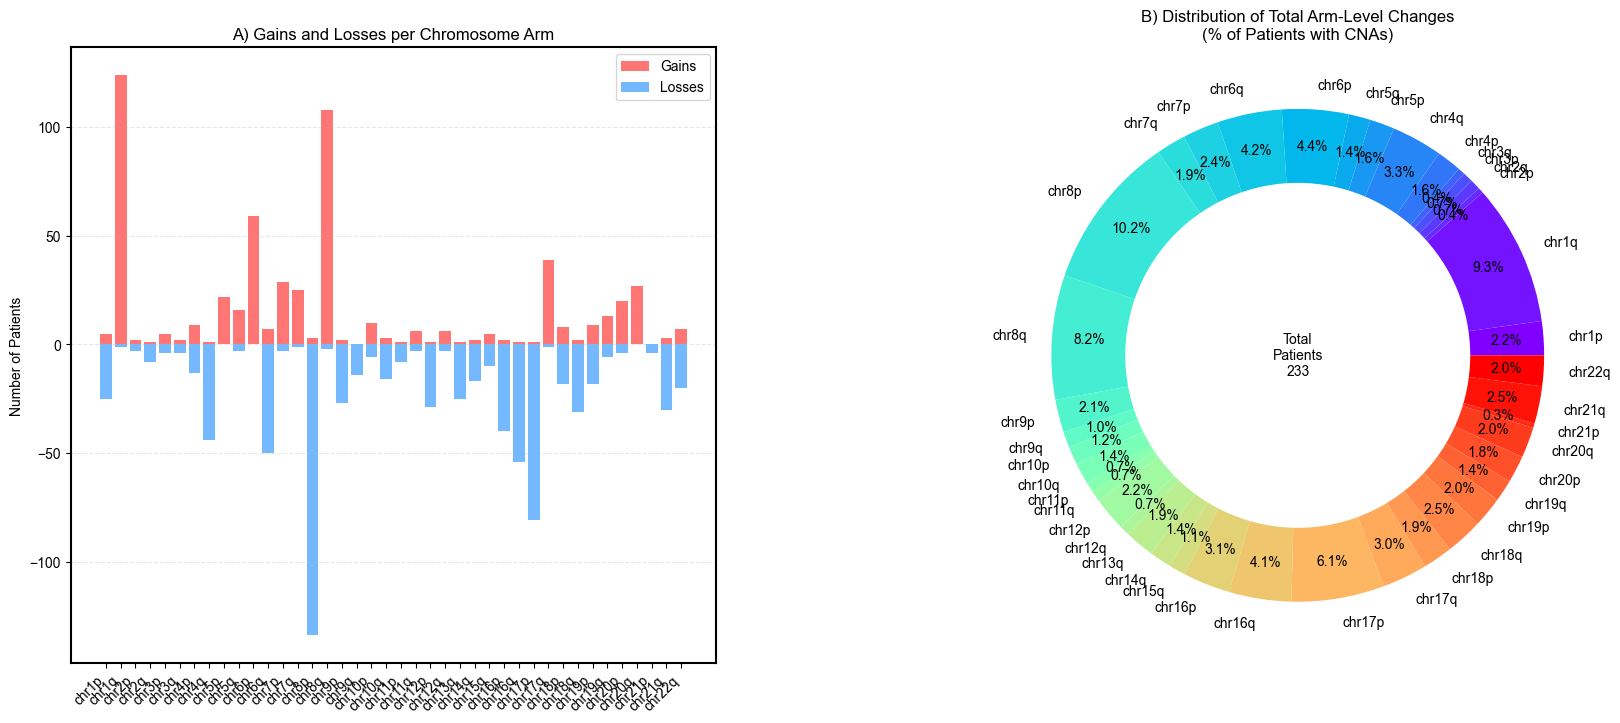

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data
df = pd.read_csv('/Users/sultanalharbi/Library/CloudStorage/OneDrive-Personal/Projects/sWGS_TKI/CNA Analysis/cBioPortal_HCC/cBioPortal_combined_study_segments_516samples.csv')

# Create figure with two subplots
fig = plt.figure(figsize=(20, 8))
plt.subplots_adjust(wspace=0.4)

# Plot A: Gains and Losses per Chromosome Arm
ax1 = plt.subplot(121)

# Create summary data
df['chrom_arm'] = df['chr'] + df['arm']
existing_arms = sorted(df['chrom_arm'].unique(), 
                      key=lambda x: (int(''.join(filter(str.isdigit, x))), x[-1]))
df['chrom_arm'] = pd.Categorical(df['chrom_arm'], categories=existing_arms, ordered=True)

def get_arm_summary(df):
    df['event'] = 'neutral'
    df.loc[df['median_bpWeighted'] > 0.1, 'event'] = 'gain'
    df.loc[df['median_bpWeighted'] < -0.1, 'event'] = 'loss'
    
    summary = df.groupby(['chrom_arm', 'event']).size().unstack(fill_value=0)
    return summary

summary = get_arm_summary(df)

# Plot bars
x = np.arange(len(existing_arms))
ax1.bar(x, summary['gain'], width=0.8, label='Gains', color='#ff7675')
ax1.bar(x, -summary['loss'], width=0.8, label='Losses', color='#74b9ff')

# Customize plot A
ax1.set_xticks(x)
ax1.set_xticklabels(existing_arms, rotation=45, ha='right')
ax1.set_ylabel('Number of Patients')
ax1.set_title('A) Gains and Losses per Chromosome Arm')
ax1.grid(True, axis='y', alpha=0.3, linestyle='--')
ax1.legend()

# Plot B: Donut chart of Distribution
ax2 = plt.subplot(122)

# Calculate percentages for each chromosome arm
total_events = df[df['event'] != 'neutral'].groupby('chrom_arm').size()
total_patients = len(df['sample'].unique())
percentages = (total_events / total_patients * 100).round(1)

# Create donut chart
colors = plt.cm.rainbow(np.linspace(0, 1, len(percentages)))
wedges, texts, autotexts = ax2.pie(percentages, 
                                  labels=percentages.index,
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  pctdistance=0.85,
                                  wedgeprops=dict(width=0.5))

# Add center circle to create donut
centre_circle = plt.Circle((0,0), 0.70, fc='white')
ax2.add_artist(centre_circle)

# Add total patients text in center
ax2.text(0, 0, f'Total\nPatients\n{total_patients}', 
         ha='center', va='center', fontsize=10)

# Customize plot B
ax2.set_title('B) Distribution of Total Arm-Level Changes\n(% of Patients with CNAs)')

plt.savefig('chromosome_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/zx/kbmrsj8d7y54tbzk_hc19nnh0000gn/T/ipykernel_43205/1027410851.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(['chrom_arm', 'event']).size().unstack(fill_value=0)


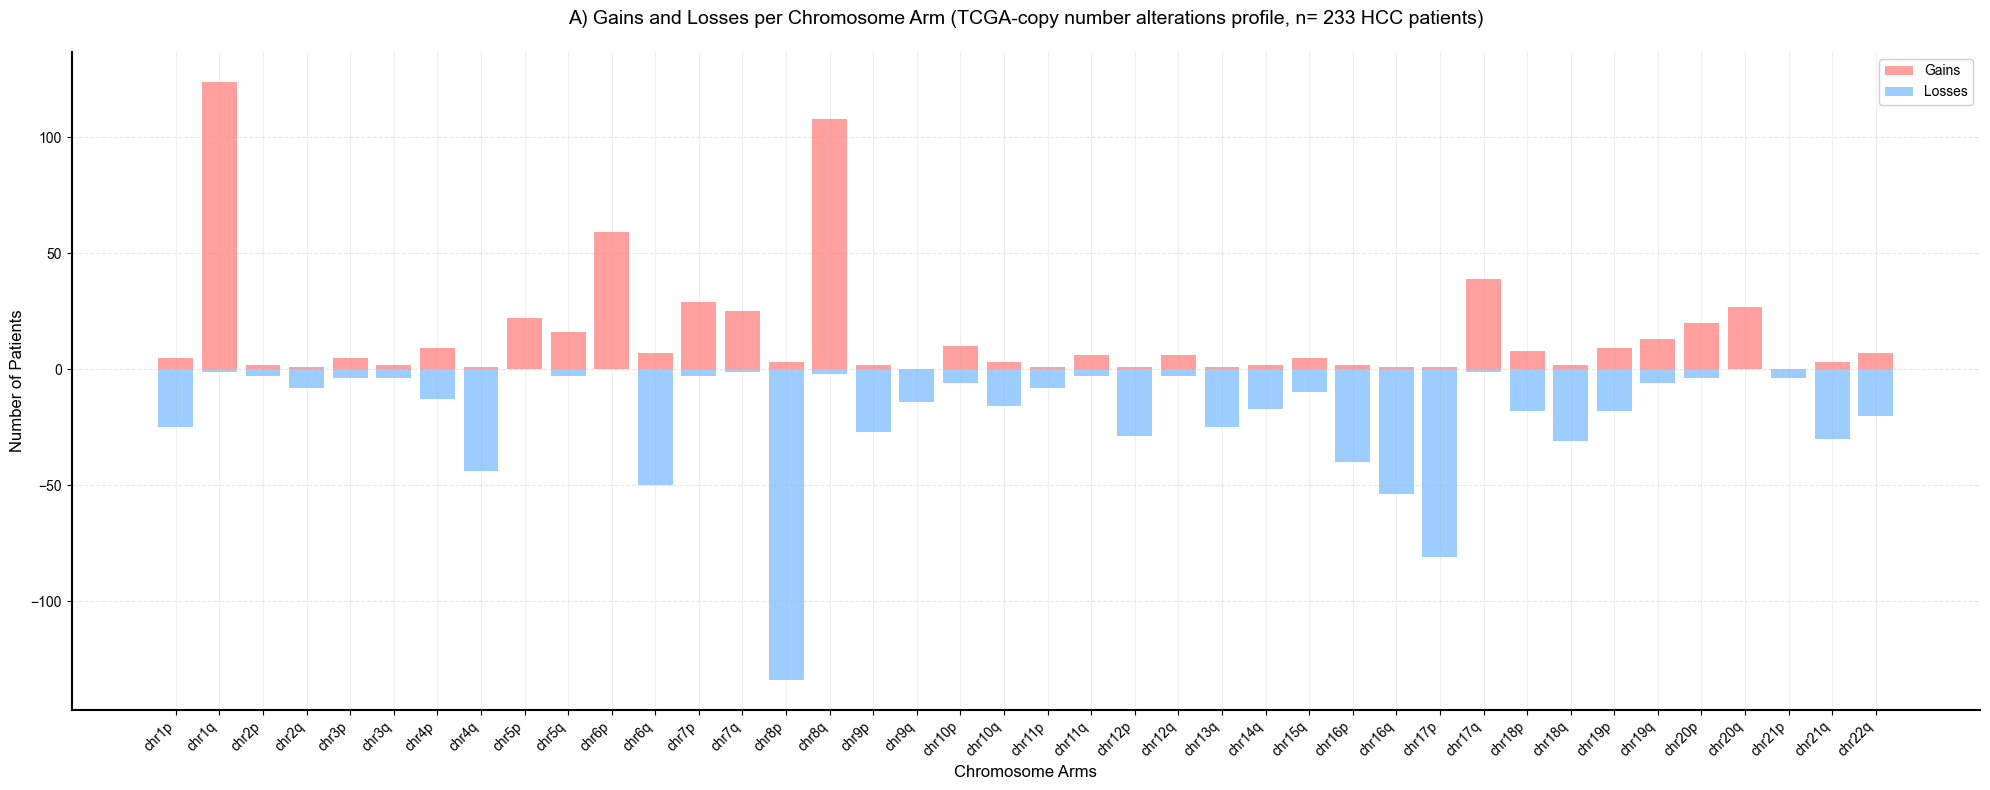

/var/folders/zx/kbmrsj8d7y54tbzk_hc19nnh0000gn/T/ipykernel_43205/1027410851.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_events = df[df['event'] != 'neutral'].groupby('chrom_arm').size()


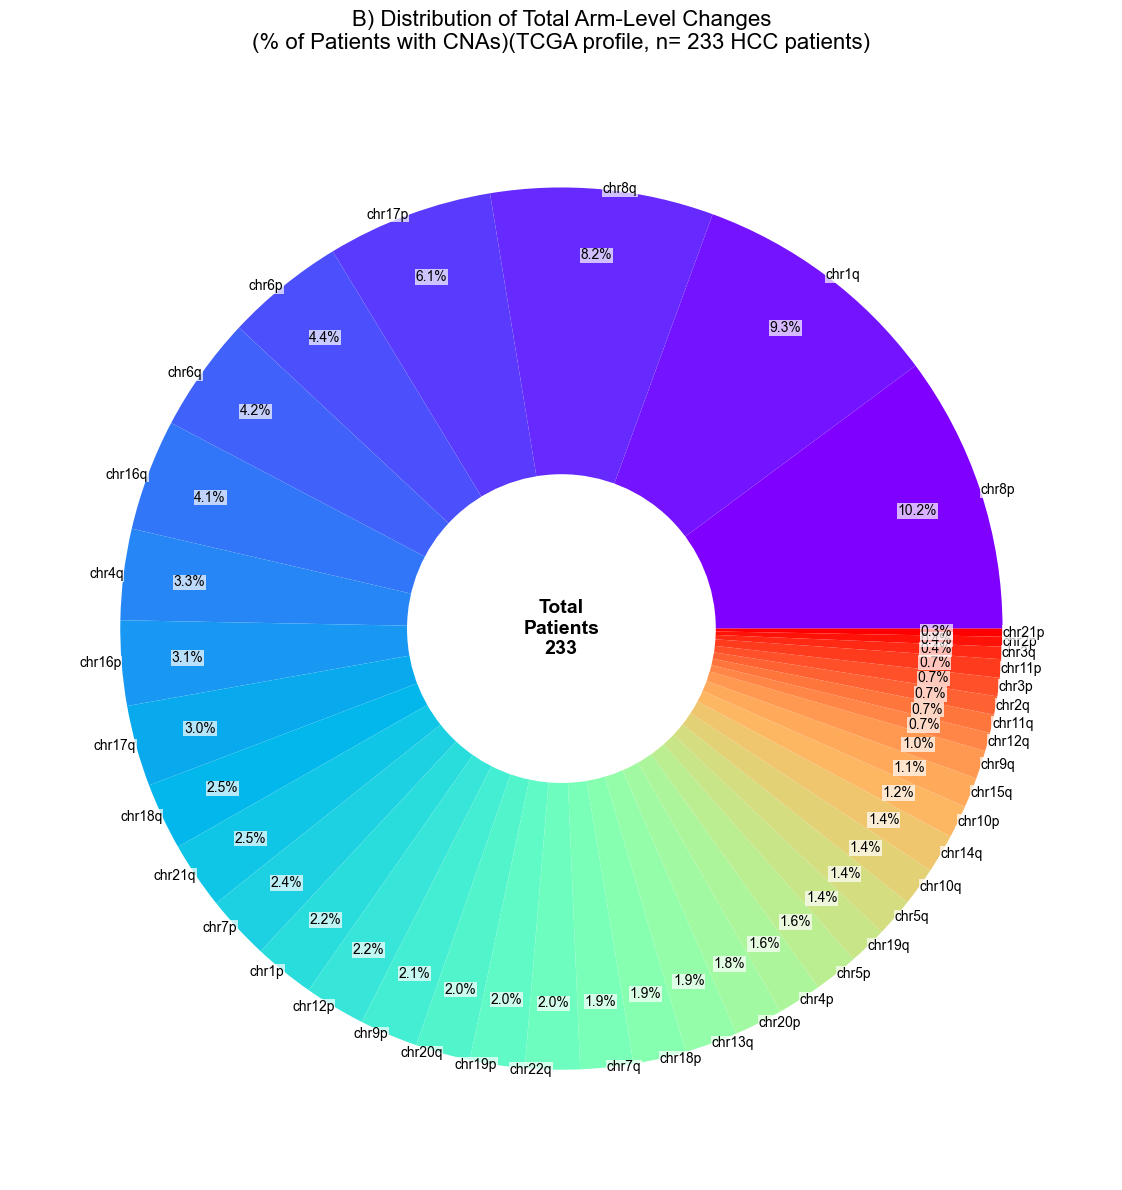

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data
df = pd.read_csv('/Users/sultanalharbi/Library/CloudStorage/OneDrive-Personal/Projects/sWGS_TKI/CNA Analysis/cBioPortal_HCC/cBioPortal_combined_study_segments_516samples.csv')

# Data preparation
df['chrom_arm'] = df['chr'] + df['arm']
existing_arms = sorted(df['chrom_arm'].unique(), 
                      key=lambda x: (int(''.join(filter(str.isdigit, x))), x[-1]))
df['chrom_arm'] = pd.Categorical(df['chrom_arm'], categories=existing_arms, ordered=True)

# Function for summary statistics
def get_arm_summary(df):
    df['event'] = 'neutral'
    df.loc[df['median_bpWeighted'] > 0.1, 'event'] = 'gain'
    df.loc[df['median_bpWeighted'] < -0.1, 'event'] = 'loss'
    return df.groupby(['chrom_arm', 'event']).size().unstack(fill_value=0)

summary = get_arm_summary(df)

# Figure 1: Bar Plot
plt.figure(figsize=(20, 8))
x = np.arange(len(existing_arms))

# Plot bars
plt.bar(x, summary['gain'], width=0.8, label='Gains', color='#ff7675', alpha=0.7)
plt.bar(x, -summary['loss'], width=0.8, label='Losses', color='#74b9ff', alpha=0.7)

# Customize bar plot
plt.xticks(x, existing_arms, rotation=45, ha='right', fontsize=10)
plt.ylabel('Number of Patients', fontsize=12)
plt.xlabel('Chromosome Arms', fontsize=12)
plt.title('A) Gains and Losses per Chromosome Arm (TCGA-copy number alterations profile, n= 233 HCC patients)', fontsize=14, pad=20)
plt.grid(True, axis='y', alpha=0.3, linestyle='--')
plt.grid(True, axis='x', alpha=0.2, linestyle='-')
plt.legend(loc='upper right', framealpha=0.9)

# Add white background to the plot
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('chromosome_gains_losses.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

# Figure 2: Donut Chart
plt.figure(figsize=(12, 12))

# Calculate percentages
total_events = df[df['event'] != 'neutral'].groupby('chrom_arm').size()
total_patients = len(df['sample'].unique())
percentages = (total_events / total_patients * 100).round(1)

# Sort percentages for better visualization
percentages_sorted = percentages.sort_values(ascending=False)

# Create color gradient
colors = plt.cm.rainbow(np.linspace(0, 1, len(percentages_sorted)))

# Create donut chart
wedges, texts, autotexts = plt.pie(percentages_sorted,
                                  labels=percentages_sorted.index,
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  pctdistance=0.85,
                                  labeldistance=1,
                                  wedgeprops=dict(width=1),
                                  textprops={'fontsize': 12})

# Enhance label visibility
for text, autotext in zip(texts, autotexts):
    text.set_fontsize(10)
    autotext.set_fontsize(10)
    autotext.set_color('black')
    text.set_color('black')
    # Add white background to labels
    text.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.7, pad=0.5))
    autotext.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.7, pad=0.5))

# Add center circle
centre_circle = plt.Circle((0,0), 0.35, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add total patients text in center
plt.text(0, 0, f'Total\nPatients\n{total_patients}', 
         ha='center', va='center', fontsize=14, fontweight='bold')

# Add title
plt.title('B) Distribution of Total Arm-Level Changes\n(% of Patients with CNAs)(TCGA profile, n= 233 HCC patients)', 
         fontsize=16, pad=20)

plt.tight_layout()
plt.savefig('chromosome_distribution.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()